In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import time

import warnings
warnings.filterwarnings('ignore')

In [3]:
import sys
sys.path.append("C:/Users/w510663/Desktop/Pyri/connections/")
from conn import snowflake_conn

# Get execution time
st = time.time()

conn = snowflake_conn()
cur = conn.cursor()

cur.execute('''
    SELECT *
    FROM DATAIKU_ANALYTICS_SUB.RISK_FRAUD.RDS_NAF_PM_EXCL_ACCOUNTS_RETRAIN_TRAIN
;
''')
df = pd.DataFrame.from_records(iter(cur), columns=[x[0] for x in cur.description])

et = time.time()
elapsed_time = et - st
print('Data Shape:', df.shape, 
      '\nExecution time:', elapsed_time / 60, 'minutes')

df.head()

Data Shape: (4708395, 33) 
Execution time: 3.052130103111267 minutes


,CUST_ID,SETID,REF_DATE,A_NAICS_2_DIGIT_C,A_TENURE_MONTHS_N,A_FLAG_REVOLVER_B,A_YEARS_IN_BUSINESS_APP_N,A_FLEET_SIZE_APP_N,D_SPREAD_EXPOSURE_6M_N,D_MAX_DAYS_PAST_DUE_6M_N,...,T_SPREAD_TOTAL_TRX_6M_N,T_SUM_GALLONS_1M_N,T_SPREAD_SUM_GALLONS_6M_N,FLAG_60_DPD_366_DAYS,FLAG_90_DPD_366_DAYS,A_BUSINESS_PROGRAM_C,A_MARKETING_CHANNEL_C,FLAG_CHARGEOFF_366_DAYS,A_PORTFOLIO_C,EXCL_FLAG_GROUP
0,0439004928792,FSC,2018-12-01 00:00:00-08:00,56,199,0,NaN,NaN,0.220102,7.0,...,0.271605,444.590,0.365067,0,0,WEX Universal,None,0,FSC,Inclusion
1,9100003978990,REV,2018-12-01 00:00:00-08:00,81,26,1,NaN,NaN,1.523576,19.0,...,2.181819,23.051,3.080870,0,0,QuikTrip Fleet Flex,None,0,REV,Inclusion
2,9100001505151,FSC,2018-12-01 00:00:00-08:00,23,84,0,NaN,NaN,1.167505,2.0,...,1.111111,9.708,1.568385,0,0,Sinclair Fleet Track,None,0,FSC,Inclusion
3,9100004731174,FSC,2018-12-01 00:00:00-08:00,81,10,0,5.0,10.0,0.678570,10.0,...,0.960000,291.005,1.331985,0,0,Family Express,Online Form,0,FSC,Inclusion
4,9100003380409,REV,2018-12-01 00:00:00-08:00,81,43,1,25.0,2.0,0.054323,4.0,...,2.181818,0.000,4.414277,0,0,WEX Fleet FlexCard Rebate Program,Direct Mail,0,REV,Inclusion


In [6]:
excl_df = df.copy()

cols_rename_map = {'CUST_ID': 'ID',
                   'FLAG_60_DPD_366_DAYS': 'target',
                   'proba_1': 'y_pred_proba',
                   'prediction': 'y_pred'
}

excl_df.rename(cols_rename_map, axis=1, inplace=True)
excl_df.head()

,ID,SETID,REF_DATE,A_NAICS_2_DIGIT_C,A_TENURE_MONTHS_N,A_FLAG_REVOLVER_B,A_YEARS_IN_BUSINESS_APP_N,A_FLEET_SIZE_APP_N,D_SPREAD_EXPOSURE_6M_N,D_MAX_DAYS_PAST_DUE_6M_N,...,T_SPREAD_TOTAL_TRX_6M_N,T_SUM_GALLONS_1M_N,T_SPREAD_SUM_GALLONS_6M_N,target,FLAG_90_DPD_366_DAYS,A_BUSINESS_PROGRAM_C,A_MARKETING_CHANNEL_C,FLAG_CHARGEOFF_366_DAYS,A_PORTFOLIO_C,EXCL_FLAG_GROUP
0,0439004928792,FSC,2018-12-01 00:00:00-08:00,56,199,0,NaN,NaN,0.220102,7.0,...,0.271605,444.590,0.365067,0,0,WEX Universal,None,0,FSC,Inclusion
1,9100003978990,REV,2018-12-01 00:00:00-08:00,81,26,1,NaN,NaN,1.523576,19.0,...,2.181819,23.051,3.080870,0,0,QuikTrip Fleet Flex,None,0,REV,Inclusion
2,9100001505151,FSC,2018-12-01 00:00:00-08:00,23,84,0,NaN,NaN,1.167505,2.0,...,1.111111,9.708,1.568385,0,0,Sinclair Fleet Track,None,0,FSC,Inclusion
3,9100004731174,FSC,2018-12-01 00:00:00-08:00,81,10,0,5.0,10.0,0.678570,10.0,...,0.960000,291.005,1.331985,0,0,Family Express,Online Form,0,FSC,Inclusion
4,9100003380409,REV,2018-12-01 00:00:00-08:00,81,43,1,25.0,2.0,0.054323,4.0,...,2.181818,0.000,4.414277,0,0,WEX Fleet FlexCard Rebate Program,Direct Mail,0,REV,Inclusion


In [11]:
grouped = excl_df.groupby(['EXCL_FLAG_GROUP'])['target'].agg(['count', 'mean']).reset_index()
grouped.columns = ['Group', 'Number of Accounts', 'Default Rate']
grouped = grouped.sort_values(by='Number of Accounts', ascending=False).reset_index()
# grouped = grouped.reindex([0, 5, 1, 9, 3, 7, 4, 8, 2, 6]).reset_index()
# grouped = grouped.drop('index', axis=1)

grouped

,index,Group,Number of Accounts,Default Rate
0,2,Inclusion,4255974,0.039359
1,1,GOV,217408,0.052491
2,0,EFPS,158632,0.002383
3,3,Large Credit Limit,44585,0.012381
4,4,VIP,31796,0.023682


In [23]:
# Get execution time
st = time.time()

conn = snowflake_conn()
cur = conn.cursor()

cur.execute('''
    SELECT *
    FROM DATAIKU_ANALYTICS_SUB.RISK_FRAUD.RDS_NAF_PM_EXCL_ACCOUNTS_RETRAIN
    WHERE REF_DATE::date >= '2021-03-01' AND REF_DATE::date <= '2022-12-01'
;
''')
validation_df = pd.DataFrame.from_records(iter(cur), columns=[x[0] for x in cur.description])

et = time.time()
elapsed_time = et - st
print('Data Shape:', validation_df.shape, 
      '\nExecution time:', elapsed_time / 60, 'minutes')

validation_df.head()

Data Shape: (5686082, 50) 
Execution time: 4.751593049367269 minutes


,CUST_ID,SETID,REF_DATE,A_NAICS_2_DIGIT_C,A_TENURE_MONTHS_N,A_FLAG_REVOLVER_B,A_YEARS_IN_BUSINESS_APP_N,A_FLEET_SIZE_APP_N,D_SPREAD_EXPOSURE_6M_N,D_MAX_DAYS_PAST_DUE_6M_N,...,EXCL_FRAUD_FLAG,EXCL_EFPS_FLAG,WX_CUST_SUSP_CLASS,GOVERNMENT_FLG,WX_CR_RATING_DATE_TO_REF_DATE,EARLIEST_ACTIVE_DATE_TO_REF_DATE,ALL_EXCL_FLAGS_SUM,RETRAIN_EXCL_FLAGS_SUM,EXCL_FLAG_GROUP,CR_LIMIT
0,9100006061698,REV,2022-12-01 00:00:00-08:00,81,50,1,NaN,NaN,2.365892,0.0,...,0,0,O,N,1495,1408.0,0,0,Inclusion,700.00
1,9100004003785,FSC,2022-12-01 00:00:00-08:00,92,74,0,NaN,NaN,3.363590,0.0,...,0,0,O,Y,2232,2103.0,1,0,GOV,750.00
2,9100007692201,WXC,2022-12-01 00:00:00-08:00,23,38,0,NaN,NaN,0.161686,6.0,...,0,0,O,N,1137,1045.0,0,0,Inclusion,1489.63
3,9100010655811,FSC,2022-12-01 00:00:00-08:00,92,7,0,92.0,6.0,1.138814,2.0,...,0,0,O,N,213,199.0,0,0,Inclusion,4000.00
4,9100006319800,WXB,2022-12-01 00:00:00-08:00,56,50,0,NaN,NaN,0.908302,18.0,...,0,0,O,N,1490,1333.0,0,0,Inclusion,9800.00


In [24]:
excl_validation = validation_df.copy()

excl_validation.rename(cols_rename_map, axis=1, inplace=True)

grouped_validation = excl_validation.groupby(['EXCL_FLAG_GROUP'])['target'].agg(['count', 'mean']).reset_index()
grouped_validation.columns = ['Group', 'Number of Accounts', 'Default Rate']
grouped_validation = grouped_validation.sort_values(by='Number of Accounts', ascending=False).reset_index()
# grouped_validation = grouped_validation.reindex([0, 5, 1, 9, 3, 7, 4, 8, 2, 6]).reset_index()
# grouped_validation = grouped_validation.drop('index', axis=1)

grouped_validation

,index,Group,Number of Accounts,Default Rate
0,2,Inclusion,5108662,0.061608
1,0,EFPS,254926,0.000930
2,1,GOV,230315,0.046050
3,4,VIP,46859,0.009753
4,3,Large Credit Limit,45320,0.014740


In [55]:
# Get execution time
st = time.time()

conn = snowflake_conn()
cur = conn.cursor()

cur.execute('''
    SELECT *
    FROM DATAIKU_ANALYTICS_SUB.RISK_FRAUD.RDS_NAF_PM_EXCL_ACCOUNTS_RETRAIN
    WHERE REF_DATE::date >= '2018-03-01' AND REF_DATE::date <= '2021-12-01'
;
''')
training_df = pd.DataFrame.from_records(iter(cur), columns=[x[0] for x in cur.description])

et = time.time()
elapsed_time = et - st
print('Data Shape:', training_df.shape, 
      '\nExecution time:', elapsed_time / 60, 'minutes')

training_df.info()

Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://myapps.wexinc.com/app/snowflake/exkaea789nRrm6HV7357/sso/saml?SAMLRequest=pZPNctowFEZfxaOubQkDNWgwGRImY1pIKD%2BZaXbCvoAGW3J0ZQxvX2FCJ10km%2B5k%2BVzp6H7S4O5U5N4RDEqtYtIKGPFApTqTaheT9erR7xEPrVCZyLWCmJwByd1wgKLISz6q7F4t4K0CtJ5bSCFvfsSkMoprgRK5EgUgtylfjmZTHgaMl0ZbneqcfCj5ukIggrHO8FaSoXR6e2tLTmld10HdDrTZ0ZAxRlmfOuqCfLvxJ3emT%2FgWZZ0L7wiHz9%2Fd7qW6tuArrc0VQp6sVnN%2F%2FrxcEW90U33QCqsCzBLMUaawXkyvAugMNm%2BCRb0OCyr0a9c7PwxKI4%2FCQi7VIUCl620uDpDqoqys2yJwI7qFjOZ6J10XJuOYlAeZpTVuwuS0mYkInmasf6yTarpKJr9%2FJMe0msv9T8HWr%2Feb5%2B2vlHgvt5jDS8wTxAom6hKudVMs7Pgs9Fl3FYa8FfFON%2Bi2o1fijZ2gVMI2lbcTFGdRlhjUcJIqbezcN%2F0rTuF0ECCiXl8tTPE9eYna3YgianoJm1zvD28MzPC%2FujKgH5d6v5dPLqrJeK5zmZ69R20KYT9PshW0mhmZ%2BdsG5VAImY%2ByzACiSzTPdf1gwHnExJoKCB1ed%2F33AQz%2FAA%

In [56]:
excl_training = training_df.copy()

excl_training.rename(cols_rename_map, axis=1, inplace=True)

grouped_training = excl_training.groupby(['EXCL_FLAG_GROUP'])['target'].agg(['count', 'mean']).reset_index()
grouped_training.columns = ['Group', 'Number of Accounts', 'Default Rate']
grouped_training = grouped_training.sort_values(by='Number of Accounts', ascending=False).reset_index()
# grouped_training = grouped_training.reindex([0, 5, 1, 9, 3, 7, 4, 8, 2, 6]).reset_index()
# grouped_training = grouped_training.drop('index', axis=1)

grouped_training

,index,Group,Number of Accounts,Default Rate
0,2,Inclusion,4255974,0.039359
1,1,GOV,217408,0.052491
2,0,EFPS,158632,0.002383
3,3,Large Credit Limit,44585,0.012381
4,4,VIP,31796,0.023682


In [57]:
feature_list = ['A_NAICS_2_DIGIT_C', 'A_TENURE_MONTHS_N', 'A_FLAG_REVOLVER_B', 'A_YEARS_IN_BUSINESS_APP_N',
       'A_FLEET_SIZE_APP_N', 'D_SPREAD_EXPOSURE_6M_N',
       'D_MAX_DAYS_PAST_DUE_6M_N', 'D_MAX_EXPOSURE_1M_N', 'D_DAYS_SINCE_LAST_SUSPENSION_CURRENT_N', 'D_DAYS_SINCE_LAST_30DPD_CURRENT_N',
       'D_DAYS_PAST_DUE_CURRENT_N', 'D_SPREAD_FRAC_UNBILLED_6M_N', 'D_MAX_FRAC_UNBILLED_1M_N', 'D_MAX_DAYS_PAST_DUE_1M_N',
       'DNB_COMMERCIAL_CREDIT_SCORE_CURRENT_N', 'DNB_FINANCIAL_STRESS_SCORE_CURRENT_N', 'LN_LEXISNEXIS_SCORE_CURRENT_N', 'LN_LEXISNEXIS_SBFE_SCORE_CURRENT_N',
       'T_TOTAL_TRX_NON_FUEL_PROPORTION_1M_N', 'T_SPREAD_GROSS_SPEND_6M_N', 'T_SPREAD_TOTAL_TRX_6M_N', 'T_SUM_GALLONS_1M_N', 'T_SPREAD_SUM_GALLONS_6M_N',
       'EXCL_FLAG_GROUP'
]

In [58]:
excl_training_na = excl_training.copy()
excl_training_na = excl_training_na[feature_list]
excl_training_na = pd.DataFrame(excl_training_na.isna().sum())
excl_training_na.rename(columns={excl_training_na.columns[0]: 'count'}, inplace = True)

# excl_training_na_na = excl_training_na_na[excl_training_na_na['count'] != 0]
excl_training_na['pct_missing'] = excl_training_na['count']/excl_training.shape[0]
# change pct_missing to x.xx% format
excl_training_na['pct_missing'] = excl_training_na['pct_missing'].apply(lambda x: '{:.1%}'.format(x))

# drop count column
excl_training_na = excl_training_na.drop(columns=['count'])

excl_training_na

,pct_missing
A_NAICS_2_DIGIT_C,0.1%
A_TENURE_MONTHS_N,0.0%
A_FLAG_REVOLVER_B,0.0%
A_YEARS_IN_BUSINESS_APP_N,75.7%
A_FLEET_SIZE_APP_N,64.7%
D_SPREAD_EXPOSURE_6M_N,0.4%
D_MAX_DAYS_PAST_DUE_6M_N,0.0%
D_MAX_EXPOSURE_1M_N,0.0%
D_DAYS_SINCE_LAST_SUSPENSION_CURRENT_N,76.9%
D_DAYS_SINCE_LAST_30DPD_CURRENT_N,90.1%


In [44]:
X = excl_training.drop(['ID', 'SETID', 'REF_DATE', 'target', 'FLAG_90_DPD_366_DAYS', 'FLAG_CHARGEOFF_366_DAYS',
                        'A_BUSINESS_PROGRAM_C', 'A_MARKETING_CHANNEL_C', 'A_PORTFOLIO_C',
                        'EXCL_PORTFOLIO_FLAG',
                        'EXCL_CUST_STATUS_FLAG', 'EXCL_CUST_TENURE_FLAG', 'EXCL_GOV_VIP_FLAG',
                        'EXCL_DUMMY_CREDIT_LIMIT_FLAG', 'EXCL_LARGE_CREDIT_LIMIT_FLAG',
                        'EXCL_MATERIAL_DELINQUENCY_FLAG', 'EXCL_CUST_CONVERSION_FLAG',
                        'EXCL_FRAUD_FLAG', 'EXCL_EFPS_FLAG', 'WX_CUST_SUSP_CLASS',
                        'GOVERNMENT_FLG', 'WX_CR_RATING_DATE_TO_REF_DATE',
                        'EARLIEST_ACTIVE_DATE_TO_REF_DATE', 'ALL_EXCL_FLAGS_SUM',
                        'RETRAIN_EXCL_FLAGS_SUM', 'CR_LIMIT'
                        ], axis=1)

y = excl_training['target']

In [45]:
# one hot encoding for A_NAICS_2_DIGIT_C, EXCL_FLAG_GROUP
X = pd.get_dummies(X, columns=['A_NAICS_2_DIGIT_C', 'EXCL_FLAG_GROUP'])

X.head()

,A_TENURE_MONTHS_N,A_FLAG_REVOLVER_B,A_YEARS_IN_BUSINESS_APP_N,A_FLEET_SIZE_APP_N,D_SPREAD_EXPOSURE_6M_N,D_MAX_DAYS_PAST_DUE_6M_N,D_MAX_EXPOSURE_1M_N,D_DAYS_SINCE_LAST_SUSPENSION_CURRENT_N,D_DAYS_SINCE_LAST_30DPD_CURRENT_N,D_DAYS_PAST_DUE_CURRENT_N,...,A_NAICS_2_DIGIT_C_71,A_NAICS_2_DIGIT_C_72,A_NAICS_2_DIGIT_C_81,A_NAICS_2_DIGIT_C_92,A_NAICS_2_DIGIT_C_Un,EXCL_FLAG_GROUP_EFPS,EXCL_FLAG_GROUP_GOV,EXCL_FLAG_GROUP_Inclusion,EXCL_FLAG_GROUP_Large Credit Limit,EXCL_FLAG_GROUP_VIP
0,18,0,NaN,NaN,0.700636,0.0,453.32,NaN,343.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,44,1,1.0,2.0,1.111794,0.0,354.25,NaN,403.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2,135,0,NaN,NaN,0.575951,9.0,265.44,NaN,NaN,0.0,...,0,0,0,1,0,0,0,1,0,0
3,138,0,NaN,NaN,0.297416,1.0,6326.67,NaN,NaN,0.0,...,0,0,0,0,0,0,0,1,0,0
4,19,0,40.0,2.0,1.425810,3.0,961.63,NaN,NaN,0.0,...,0,0,0,0,0,0,0,1,0,0


In [47]:
# split the dataset into the training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [48]:
# build the lightgbm model
import lightgbm as lgb

clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier()

In [49]:
# predict the results
y_pred=clf.predict(X_test)

In [50]:
# view accuracy
from sklearn.metrics import roc_auc_score

accuracy=roc_auc_score(y_pred, y_test)
print('LightGBM Model roc_auc score: {0:0.4f}'.format(roc_auc_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.6148


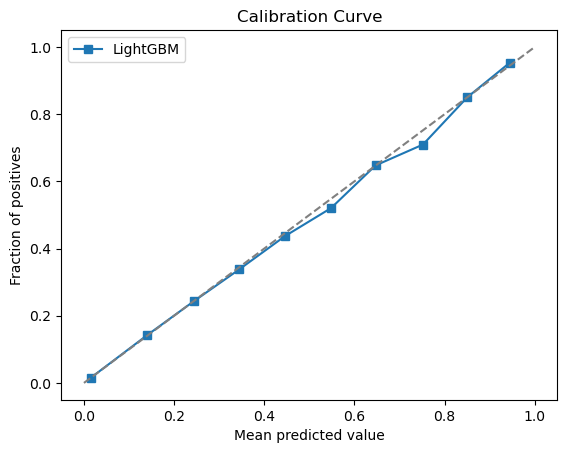

In [51]:
# plot calibration curve
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss
import matplotlib.pyplot as plt

prob_pos = clf.predict_proba(X_test)[:, 1]
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=10)

plt.plot(mean_predicted_value, fraction_of_positives, 's-', label='LightGBM')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel('Mean predicted value')
plt.ylabel('Fraction of positives')
plt.title('Calibration Curve')
plt.legend()
plt.show()